In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# data load
df = pd.read_pickle('/Users/sangjun/Desktop/MSDS_Course/MSDS_601/Final_Project/AfterWrangling.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


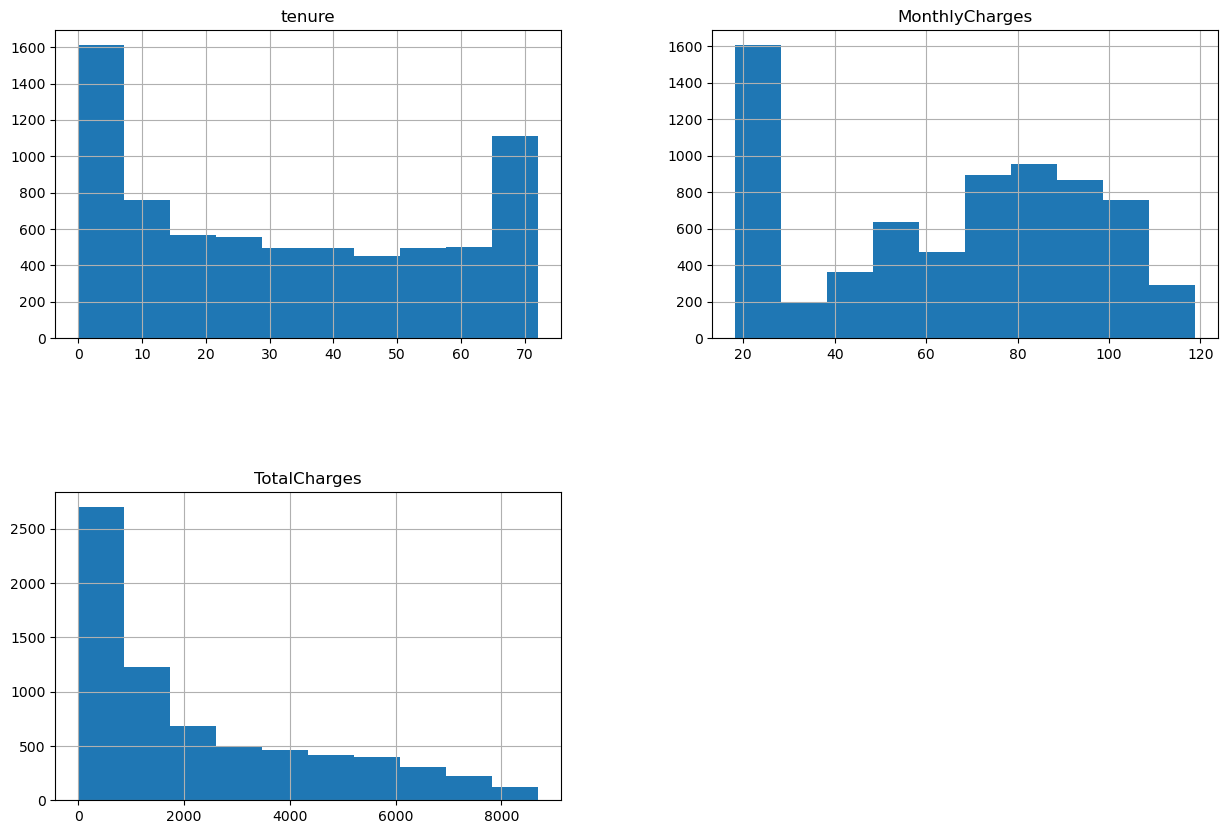

In [4]:
# Review Distribution of integer variables
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Check the Influential Points

In [14]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y, X = dmatrices('Churn~gender+SeniorCitizen + Partner + Dependents +tenure + PhoneService + MultipleLines+InternetService+OnlineSecurity+OnlineBackup+DeviceProtection+TechSupport+StreamingTV+StreamingMovies+Contract+PaperlessBilling+PaymentMethod + MonthlyCharges + TotalCharges', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


    VIF Factor                                  features
0     0.000000                                 Intercept
1     1.002137                            gender[T.Male]
2     1.153365                        SeniorCitizen[T.1]
3     1.462701                            Partner[T.Yes]
4     1.384430                         Dependents[T.Yes]
5          inf                       PhoneService[T.Yes]
6          inf         MultipleLines[T.No phone service]
7     7.273906                      MultipleLines[T.Yes]
8   148.263380            InternetService[T.Fiber optic]
9          inf                     InternetService[T.No]
10         inf     OnlineSecurity[T.No internet service]
11    6.336249                     OnlineSecurity[T.Yes]
12         inf       OnlineBackup[T.No internet service]
13    6.782866                       OnlineBackup[T.Yes]
14         inf   DeviceProtection[T.No internet service]
15    6.922434                   DeviceProtection[T.Yes]
16         inf        TechSuppo

In [9]:
# y variable has to be integer value.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

model = smf.ols('Churn~gender+SeniorCitizen + Partner + Dependents +tenure + PhoneService + MultipleLines+InternetService+OnlineSecurity+OnlineBackup+DeviceProtection+TechSupport+StreamingTV+StreamingMovies+Contract+PaperlessBilling+PaymentMethod + MonthlyCharges + TotalCharges',data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     121.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:16:44   Log-Likelihood:                -3058.7
No. Observations:                7043   AIC:                             6165.
Df Residuals:                    7019   BIC:                             6330.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.2738      0.103      2.664      0.008       0.072       0.475
gender[T.Male]                              -0.0033      0.009     -0.369      0.712      -0.021       0.014
SeniorCitizen[T.1]                           0.0442      0.013      3.403      0.001       0.019       0.070
Partner[T.Yes]                              -0.0012      0.011     -0.113      0.910      -0.022       0.020
Dependents[T.Yes]                           -0.0209      0.011     -1.826      0.068      -0.043       0.002
PhoneService[T.Yes]                          0.1347      0.095      1.417      0.156      -0.052       0.321
MultipleLines[T.No phone service]            0.1391      0.014      9.655      0.000       0.111       0.167
MultipleLines[T.Yes]                         0.0581      0.024      2.387      0.017       0.010       0.106
InternetService[T.Fiber optic]               0.2110      0.109      1.929      0.054      -0.003       0.425
InternetService[T.No]                       -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineSecurity[T.No internet service]       -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineSecurity[T.Yes]                       -0.0427      0.025     -1.720      0.085      -0.091       0.006
OnlineBackup[T.No internet service]         -0.0257      0.016     -1.631      0.103      -0.057       0.005
OnlineBackup[T.Yes]                         -0.0118      0.024     -0.483      0.629      -0.060       0.036
DeviceProtection[T.No internet service]     -0.0257      0.016     -1.631      0.103      -0.057       0.005
DeviceProtection[T.Yes]                      0.0043      0.025      0.174      0.862      -0.044       0.053
TechSupport[T.No internet service]          -0.0257      0.016     -1.631      0.103      -0.057       0.005
TechSupport[T.Yes]                          -0.0438      0.025     -1.754      0.079      -0.093       0.005
StreamingTV[T.No internet service]          -0.0257      0.016     -1.631      0.103      -0.057       0.005
StreamingTV[T.Yes]                           0.0635      0.045      1.412      0.158      -0.025       0.152
StreamingMovies[T.No internet service]      -0.0257      0.016     -1.631      0.103      -0.057       0.005
StreamingMovies[T.Yes]                       0.0664      0.045      1.478      0.139      -0.022       0.155
Contract[T.One year]                        -0.1069      0.014     -7.654      0.000      -0.134      -0.080
Contract[T.Two year]                        -0.0730      0.017     -4.317      0.000      -0.106      -0.040
PaperlessBilling[T.Yes]                      0.0449      0.010      4.502      0.000       0.025       0.064
PaymentMethod[T.Credit card (au